In [54]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns 

In [55]:
traditional_82 = pd.read_csv('./82_team_dataset/2000-2021-T.csv')

traditional_20 = pd.read_csv('./10_team_dataset/2000-2021-T.csv').drop(['GP','W', 'L'], axis=1)
advanced_20 = pd.read_csv('./10_team_dataset/2000-2021-A.csv').drop(['GP','W', 'L'], axis=1)
opponent_20 = pd.read_csv('./10_team_dataset/2000-2021-OPP.csv').drop(['GP','W', 'L'], axis=1)

In [56]:
merge_82 = traditional_82[['Team', 'Year', 'WIN%']]
advanced_20

,#,Team,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS,Year
0,1,Philadelphia 76ers,480,103.1,91.1,12.0,59.3,1.24,16.1,33.0,66.2,50.6,17.9,47.7,53.4,93.53,61.7,934,2000
1,2,Dallas Mavericks,576,98.5,101.0,-2.5,53.8,1.22,15.0,27.4,66.0,46.8,16.3,47.1,51.7,93.54,48.4,1124,2000
2,3,Los Angeles Lakers,533,106.1,102.9,3.3,59.8,1.49,17.3,33.4,69.1,51.4,16.4,50.3,53.5,91.36,52.0,1013,2000
3,3,New York Knicks,533,96.7,94.5,2.1,52.6,1.15,14.6,28.3,70.7,49.8,16.9,45.9,50.8,88.98,50.8,990,2000
4,3,Phoenix Suns,480,99.3,91.4,7.9,65.2,1.24,17.7,33.2,69.1,51.5,20.0,48.1,52.5,96.15,56.7,960,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,26,Houston Rockets,389,110.8,110.9,-0.1,57.5,1.53,17.1,23.0,69.9,47.5,14.9,55.2,58.8,100.38,50.8,814,2020
622,26,Minnesota Timberwolves,485,105.5,114.8,-9.3,57.7,1.58,16.7,27.4,70.9,48.4,14.5,50.8,53.9,102.24,45.0,1031,2020
623,26,Washington Wizards,528,113.6,114.4,-0.8,62.1,2.01,18.8,23.8,75.6,48.6,12.8,54.8,58.1,106.00,48.3,1166,2020
624,29,Detroit Pistons,495,106.1,111.8,-5.7,61.0,1.75,16.8,26.9,72.8,47.8,13.2,48.7,52.9,99.73,45.6,1025,2020


In [57]:
everything = pd.merge(traditional_20, opponent_20, how="inner", on=["Team", "Year"])
everything = everything.drop(['#_x','#_y', '+/-_y'], axis=1)
everything = pd.merge(everything, advanced_20, how="inner", on=["Team", "Year"])
everything = everything.drop(['#'], axis=1).rename(columns={'+/-_x': '+/-', 'MIN_x': "MIN AVG", 'MIN_y': 'MIN TOTAL'})
everything = pd.merge(everything, merge_82, how="inner", on=["Team", "Year"])
everything = everything.rename(columns={'WIN%_y': 'WIN_FINAL', 'WIN%_x': 'WIN%'})
everything

,Team,WIN%,MIN AVG,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS,WIN_FINAL
0,Philadelphia 76ers,1.000,48.0,94.3,34.0,75.1,45.3,2.7,10.3,25.8,...,33.0,66.2,50.6,17.9,47.7,53.4,93.53,61.7,934,0.683
1,Utah Jazz,0.778,48.6,97.1,35.2,72.2,48.8,4.0,9.6,41.9,...,32.4,70.3,52.2,18.2,50.5,55.1,91.05,56.2,923,0.646
2,Phoenix Suns,0.700,48.0,95.3,36.5,80.2,45.5,4.2,15.8,26.6,...,33.2,69.1,51.5,20.0,48.1,52.5,96.15,56.7,960,0.622
3,Sacramento Kings,0.700,50.0,101.4,37.2,83.4,44.6,5.8,16.3,35.6,...,29.6,68.2,48.9,15.8,48.1,53.1,94.61,57.8,989,0.671
4,San Antonio Spurs,0.700,48.5,93.7,34.6,77.0,44.9,3.9,9.4,41.5,...,30.2,71.7,51.8,17.4,47.5,52.5,93.28,53.7,944,0.707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Chicago Bulls,0.364,48.0,116.1,41.9,87.9,47.7,13.4,35.5,37.7,...,26.7,75.4,51.4,17.0,55.3,59.2,104.73,48.1,1155,0.431
622,Minnesota Timberwolves,0.300,48.5,108.8,40.7,91.5,44.5,11.5,34.1,33.7,...,27.4,70.9,48.4,14.5,50.8,53.9,102.24,45.0,1031,0.319
623,Washington Wizards,0.273,48.0,120.5,43.9,91.9,47.8,13.0,33.5,38.9,...,23.8,75.6,48.6,12.8,54.8,58.1,106.00,48.3,1166,0.472
624,Detroit Pistons,0.200,49.5,108.8,38.7,92.7,41.7,12.8,38.3,33.4,...,26.9,72.8,47.8,13.2,48.7,52.9,99.73,45.6,1025,0.278


In [58]:
dataset = everything.drop(['Team', 'Year'], axis=1)
winPercentage = dataset.iloc[:,-1:].values
playoffStatus = map(lambda x: x > 0.5, winPercentage)
playoffStatus = np.fromiter(playoffStatus, dtype=bool)
dataset['Playoffs'] = playoffStatus
dataset

,WIN%,MIN AVG,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,POSS,WIN_FINAL,Playoffs
0,1.000,48.0,94.3,34.0,75.1,45.3,2.7,10.3,25.8,23.7,...,66.2,50.6,17.9,47.7,53.4,93.53,61.7,934,0.683,True
1,0.778,48.6,97.1,35.2,72.2,48.8,4.0,9.6,41.9,22.7,...,70.3,52.2,18.2,50.5,55.1,91.05,56.2,923,0.646,True
2,0.700,48.0,95.3,36.5,80.2,45.5,4.2,15.8,26.6,18.1,...,69.1,51.5,20.0,48.1,52.5,96.15,56.7,960,0.622,True
3,0.700,50.0,101.4,37.2,83.4,44.6,5.8,16.3,35.6,21.2,...,68.2,48.9,15.8,48.1,53.1,94.61,57.8,989,0.671,True
4,0.700,48.5,93.7,34.6,77.0,44.9,3.9,9.4,41.5,20.6,...,71.7,51.8,17.4,47.5,52.5,93.28,53.7,944,0.707,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,0.364,48.0,116.1,41.9,87.9,47.7,13.4,35.5,37.7,18.9,...,75.4,51.4,17.0,55.3,59.2,104.73,48.1,1155,0.431,False
622,0.300,48.5,108.8,40.7,91.5,44.5,11.5,34.1,33.7,15.9,...,70.9,48.4,14.5,50.8,53.9,102.24,45.0,1031,0.319,False
623,0.273,48.0,120.5,43.9,91.9,47.8,13.0,33.5,38.9,19.6,...,75.6,48.6,12.8,54.8,58.1,106.00,48.3,1166,0.472,False
624,0.200,49.5,108.8,38.7,92.7,41.7,12.8,38.3,33.4,18.6,...,72.8,47.8,13.2,48.7,52.9,99.73,45.6,1025,0.278,False


In [59]:
X = dataset.iloc[:,0:-2]  #independent columns
y = dataset.iloc[:,-2:-1]    #target column

In [60]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features

        Specs       Score
0        WIN%  671.919467
22        +/-  636.538667
58        PIE  559.474997
47     NETRTG  559.368438
45     OFFRTG  156.742673
5         FG%  146.634448
56        TS%  146.105090
55       EFG%  117.134355
50  AST RATIO  100.523905
26    OPP FG%   94.152564
49     AST/TO   81.793326
46     DEFRTG   80.972582
19       BLKA   76.016595
15        AST   71.234996
39    OPP BLK   71.227026
36    OPP AST   64.588391
2         PTS   54.378728
8         3P%   51.990538
3         FGM   38.609082
43    OPP PTS   37.678176
13       DREB   31.853646
35    OPP REB   31.705333
48       AST%   30.839461
34   OPP DREB   29.684851
24    OPP FGM   28.880954
53       REB%   25.836131
54       TOV%   22.153082
18        BLK   21.799084
16        TOV   21.747870
40   OPP BLKA   20.684561
6         3PM   20.116438
31    OPP FTA   19.766493
30    OPP FTM   18.251861
29    OPP 3P%   16.959717
20         PF   15.990880
42    OPP PFD   15.479195
12       OREB   13.442146
11        FT

/Users/marcteoong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


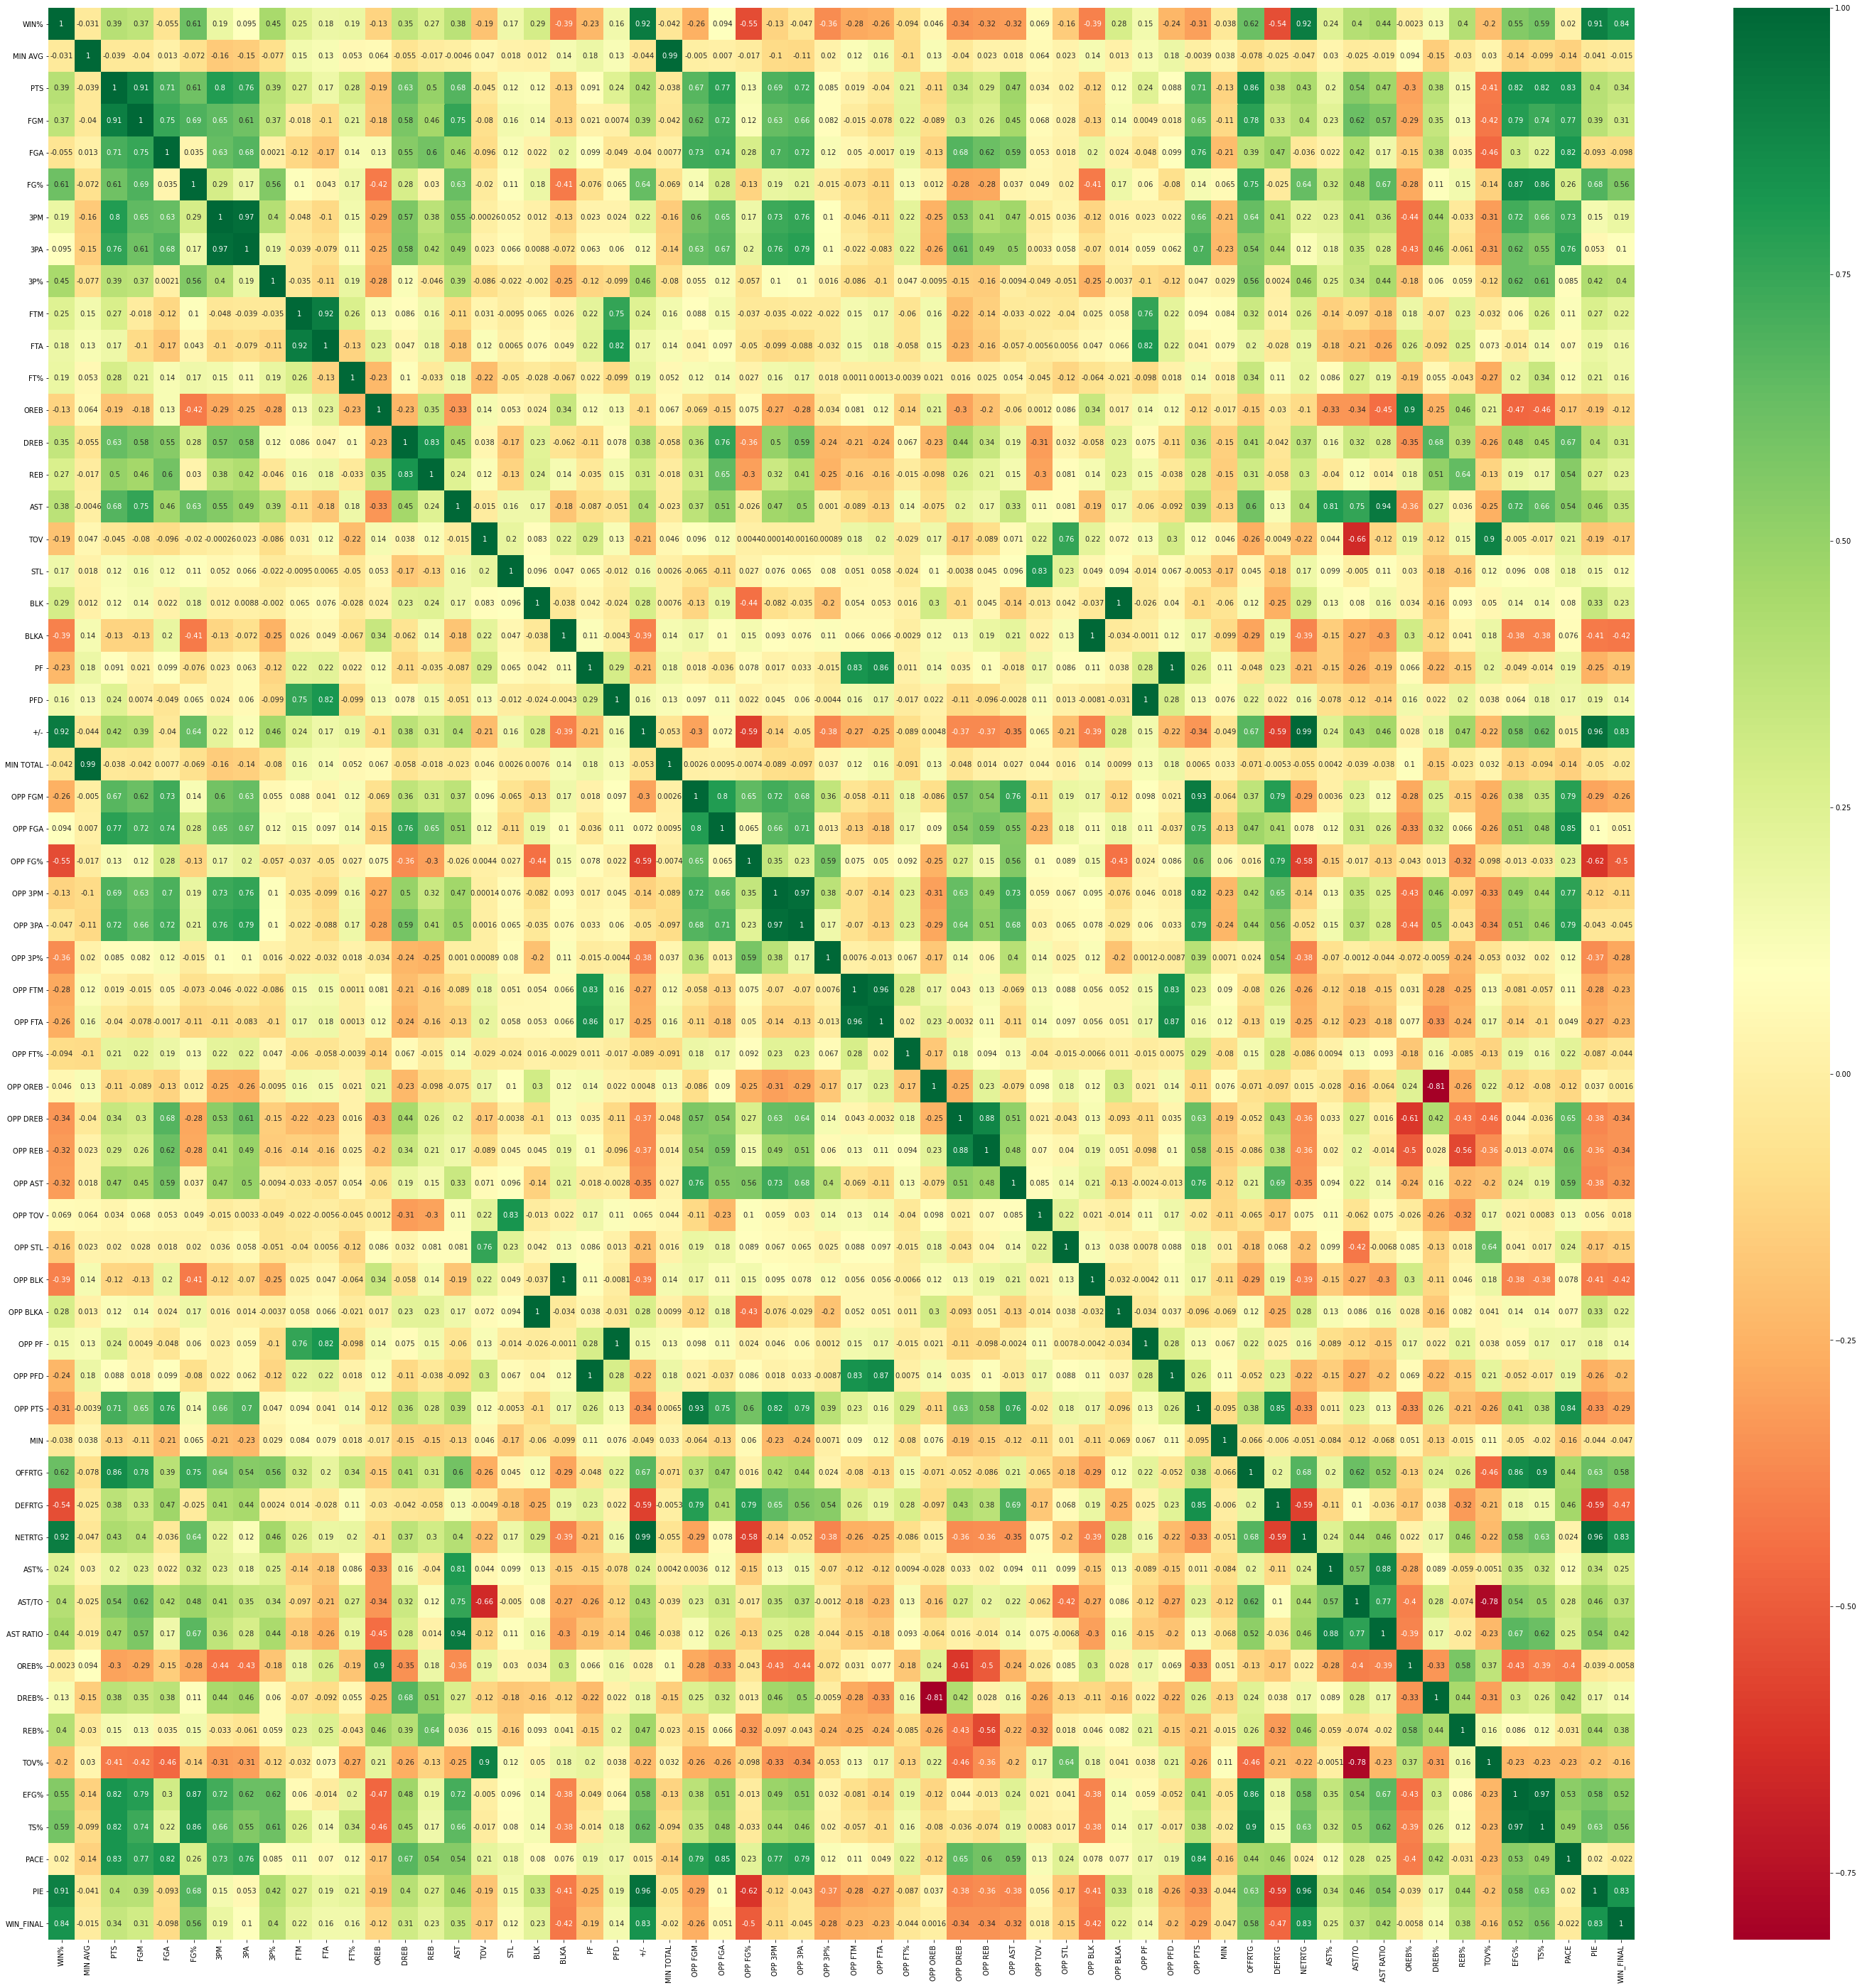

In [44]:
corrmat = dataset.drop(['Playoffs'], axis=1).corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
#plot heat map
g=sns.heatmap(everything[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y = pd.Series(map(lambda x : int(x * 1000), dataset.WIN_FINAL))
X = X[['NETRTG', 'PIE', '+/-', 'WIN%', 'FG%', 'OPP FG%', 'OFFRTG', 'TS%', 'EFG%', 'DEFRTG', '3P%', 'OPP 3P%', 'BLKA', 'OPP BLK', 
       'REB%', 'OPP AST', 'AST/TO', 'OPP REB', 'AST RATIO', 'PTS', 'DREB', 'OPP DREB', 'OPP PTS', 
       'OPP FGM', 'FGM', 'AST', 'BLK', 'OPP BLKA', 'OPP FTM', 'REB', 'TOV', 'OPP FTA', 'OPP STL', 
       'TOV%', '3PM', 'PF', 'OPP PFD', 'FT%', 'DREB%', 'FTM', 'STL']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=112351)

In [84]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

pred=linear.predict(X_test)

print(mean_squared_error(y_test, pred, squared=False)/1000)

0.09008407228002355


In [85]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br.fit(X_train, y_train)

pred=br.predict(X_test)

print(mean_squared_error(y_test, pred, squared=False)/1000)

0.09332706026860584


In [86]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X_train, y_train)

pred=elastic.predict(X_test)

print(mean_squared_error(y_test, pred, squared=False)/1000)

0.09259900665185286


In [87]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic.fit(X_train, y_train)

pred=logistic.predict(X_test)

print(mean_squared_error(y_test, pred, squared=False)/1000)

0.1360319370518893


In [88]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

pred=gbr.predict(X_test)

print(mean_squared_error(y_test, pred, squared=False)/1000)

0.09448187666769689


In [89]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

pred=svr.predict(X_test)

print(mean_squared_error(y_test, pred, squared=False)/1000)

0.13947659904621326
